# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.52e-06
Time:                        10:30:17   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

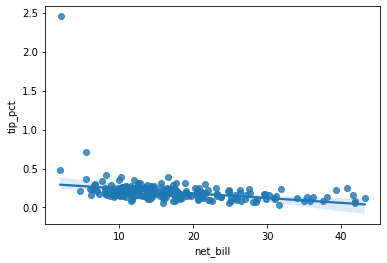

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from seaborn import load_dataset
import statsmodels.formula.api as smf

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Reproduzindo a regressão
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg.summary())

# gráfico de dispersão
sns.regplot(y='tip_pct', x='net_bill', data = tips);

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.62e-13
Time:                        10:30:24   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

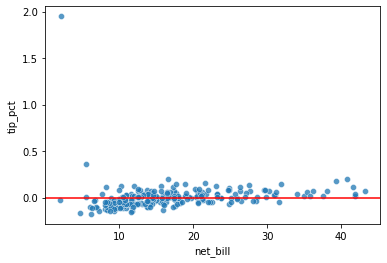

In [2]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='-')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.530
Date:                Wed, 09 Aug 2023   Prob (F-statistic):             0.0343
Time:                        10:38:00   Log-Likelihood:                 126.07
No. Observations:                 244   AIC:                            -248.1
Df Residuals:                     242   BIC:                            -241.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0414    

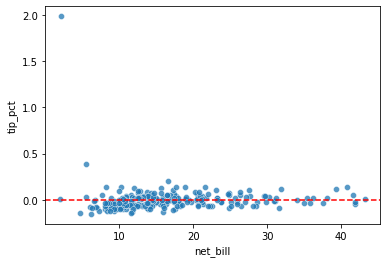

In [15]:
reg = smf.ols('tip_pct ~ np.poly1d(net_bill)', data=tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.03799
Date:                Wed, 09 Aug 2023   Prob (F-statistic):              0.846
Time:                        10:41:37   Log-Likelihood:                -65.778
No. Observations:                  57   AIC:                             135.6
Df Residuals:                      55   BIC:                             139.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4427      0.258     -1.714      0.0

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


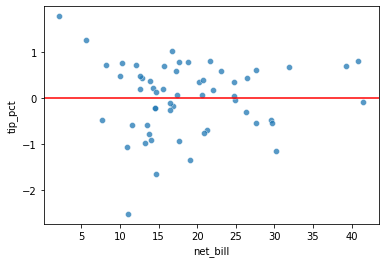

In [18]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='-')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.644
Date:                Wed, 09 Aug 2023   Prob (F-statistic):              0.114
Time:                        10:42:19   Log-Likelihood:                -40.273
No. Observations:                  32   AIC:                             84.55
Df Residuals:                      30   BIC:                             87.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3639      0.791  

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


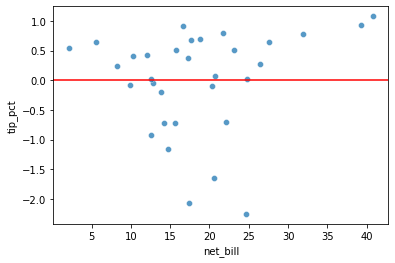

In [19]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='-')

###  6. qual modelo resultou no melhor ajuste?

In [21]:
# O modelo de melhor ajuste, devido a variância ser mais uniforme, foi no modelo no log de tip_pct em função de net_bill.